<a href="https://colab.research.google.com/github/Satyake/TF-ZTM/blob/main/Siamese_Network_Direct_Classification_with_Sigmoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import tensorflow as tf
import numpy as np
import keras
from keras import backend as K

In [62]:
(x_train1,y_train1),(x_test1,y_test1)=tf.keras.datasets.mnist.load_data()
x_train1=x_train1.astype('float32')
x_test1=x_test1.astype('float32')

x_train1=x_train1/255.0
x_test1=x_test1/255.0

In [63]:
#(x_train2,y_train2),(x_test2,y_test2)=tf.keras.datasets.mnist.load_data()

In [64]:
#x_train1.shape

In [65]:
x_train1.shape

(60000, 28, 28)

In [66]:
x_test1.shape

(10000, 28, 28)

In [67]:
y_test1.shape

(10000,)

In [68]:
y_test1.shape

(10000,)

In [69]:
#y_train1=y_train1.squeeze()

In [70]:
#y_test1=y_test1.squeeze()

In [71]:
#y_train1.shape

In [72]:
def generate_pairs(x,y):  #for colored
  pairs=[]
  labels=[]
  classes=max(y)[0]+1
  indices=[np.where(y==i)[0] for i in range(classes)]
  for idx in range(len(x)):
    x1=x[idx]
    label=y[idx]
    idx2=np.random.choice(indices[label[0]])
    x2=x[idx2]
    pairs+=[[x1,x2]]
    labels+=[1]
    label2=np.random.randint(0,classes-1)
    while label2==label[0]:
      label2=np.random.randint(0,classes-1)
    idx2=np.random.choice(indices[label2])
    x2=x[idx2]
    pairs+=[[x1,x2]]
    labels+=[0]
  return np.array(pairs), np.array(labels)

def generate_pairs_g(x,y):   #for grayscale
  pairs=[]
  labels=[]
  classes=max(y)+1
  indices=[np.where(y==i)[0] for i in range(classes)]
  for idx in range(len(x)):
    x1=x[idx]
    label=y[idx]
    idx2=np.random.choice(indices[label])
    x2=x[idx2]
    pairs+=[[x1,x2]]
    labels+=[1]
    label2=np.random.randint(0,classes-1)
    while label2==label:
      label2=np.random.randint(0,classes-1)
    idx2=np.random.choice(indices[label2])
    x2=x[idx2]
    pairs+=[[x1,x2]]
    labels+=[0]
  return np.array(pairs), np.array(labels)

In [73]:
import random


In [74]:
#classes=max(y_train1)[0]+1
#indices=[np.where(y_train1==i)[0] for i in range(classes)]
#pairs=[]
#labels=[]
#for idx in range(len(x_train1)):
#  x1=x_train1[idx]
#  idx2=np.random.choice(indices[label[0]])
  #x2=x_train1[idx2]
  #pairs+=[[x1,x2]]
  #label2=np.random.randint(0,classes-1)
  #print(label2)
  #while label2==label[0]:
  #  label2=random.randint(0,classes-1)
#  print(idx2)

In [75]:
x_train=x_train1.reshape(x_train1.shape[0],28,28,1)
x_test=x_test1.reshape(x_test1.shape[0],28,28,1)

In [76]:
#x_train=x_train2.reshape(x_train2.shape[0],28,28,1)
#x_test=x_test2.reshape(x_test2.shape[0],28,28,1)

In [77]:
x_train.shape

(60000, 28, 28, 1)

In [78]:
x_test.shape

(10000, 28, 28, 1)

In [79]:
train_pairs,train_labels=generate_pairs_g(x_train,y_train1)


In [80]:
test_pairs, test_labels=generate_pairs_g(x_test,y_test1)

In [81]:
print(train_pairs.shape)
print(test_pairs.shape)

(120000, 2, 28, 28, 1)
(20000, 2, 28, 28, 1)


In [82]:
input=tf.keras.layers.Input(shape=(28,28,1,))
l1=tf.keras.layers.Conv2D(32,3, activation='relu')(input)
l2=tf.keras.layers.MaxPool2D(pool_size=(2,2))(l1)
l3=tf.keras.layers.Flatten()(l2)
out=tf.keras.layers.Dense(128)(l3)
model=tf.keras.Model(inputs=input, outputs=out)



In [83]:
def euclidean(vects):
  x,y=vects
  sum_square=K.sum(K.square(x-y), keepdims=True, axis=1)
  return K.sqrt(K.maximum(sum_square,K.epsilon()))

In [84]:
inp1=tf.keras.layers.Input(shape=(28,28,1,))
inp2=tf.keras.layers.Input(shape=(28,28,1,))
model1=model(inp1)
model2=model(inp2)
concat=tf.keras.layers.Lambda(euclidean)([model1,model2])
dense=tf.keras.layers.Dense(1, activation='sigmoid')(concat)
model_final=tf.keras.Model(inputs=[inp1, inp2], outputs=dense)

In [85]:
model_final.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 input_6 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 model_2 (Functional)        (None, 128)                  692672    ['input_5[0][0]',             
                                                                     'input_6[0][0]']             
                                                                                                  
 lambda_1 (Lambda)           (None, 1)                    0         ['model_2[0][0]',       

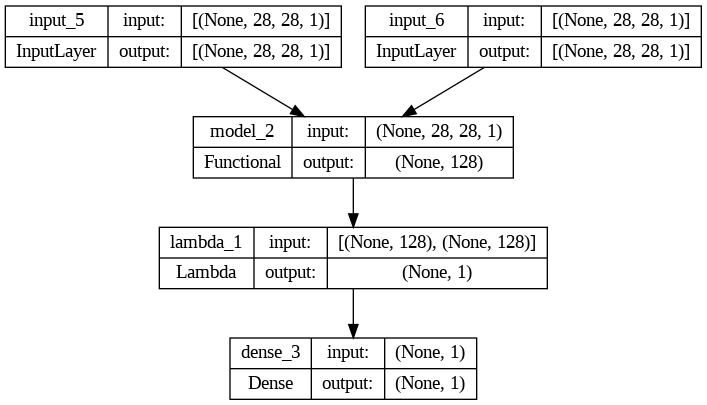

In [86]:
tf.keras.utils.plot_model(model_final, show_shapes=True)

In [87]:
model_final.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')

In [88]:
train_pairs.shape

(120000, 2, 28, 28, 1)

In [89]:
train_labels

array([1, 0, 1, ..., 0, 1, 0])

In [90]:
h1=model_final.fit([train_pairs[:,0],train_pairs[:,1]],
                   train_labels[:],validation_data=([test_pairs[:,0],test_pairs[:,1]],test_labels[:]),
                epochs=20)

Epoch 1/20
3750/3750 [==============================] - 79s 21ms/step - loss: 0.3668 - accuracy: 0.8563 - val_loss: 0.2144 - val_accuracy: 0.9568
Epoch 2/20
3750/3750 [==============================] - 79s 21ms/step - loss: 0.1579 - accuracy: 0.9659 - val_loss: 0.1227 - val_accuracy: 0.9697
Epoch 3/20
3750/3750 [==============================] - 79s 21ms/step - loss: 0.0970 - accuracy: 0.9762 - val_loss: 0.0950 - val_accuracy: 0.9715
Epoch 4/20
3750/3750 [==============================] - 78s 21ms/step - loss: 0.0713 - accuracy: 0.9812 - val_loss: 0.0863 - val_accuracy: 0.9724
Epoch 5/20
3750/3750 [==============================] - 81s 22ms/step - loss: 0.0572 - accuracy: 0.9844 - val_loss: 0.0736 - val_accuracy: 0.9747
Epoch 6/20
3750/3750 [==============================] - 79s 21ms/step - loss: 0.0470 - accuracy: 0.9879 - val_loss: 0.0725 - val_accuracy: 0.9740
Epoch 7/20
3750/3750 [==============================] - 79s 21ms/step - loss: 0.0396 - accuracy: 0.9899 - val_loss: 0.0722 -

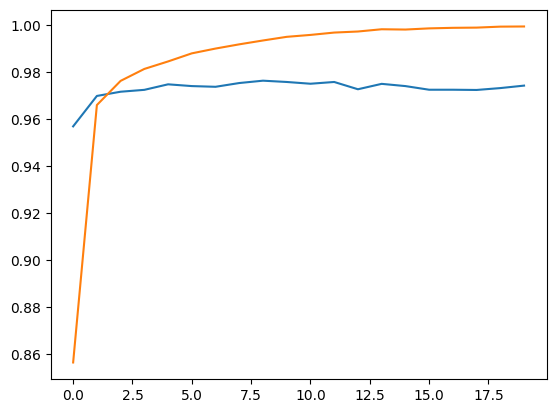

In [91]:
import matplotlib.pyplot as plt
plt.plot(h1.history['val_accuracy'])
plt.plot(h1.history['accuracy'])